In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)


In [2]:
df = pd.read_csv("../data/raw/diabetes.csv")


In [4]:
print("\n" + "="*80)
print("1. PIERWSZE 5 REKORDÓW")
print("="*80)
print(df.head())

print("\n" + "="*80)
print("2. INFORMACJE O STRUKTURZE DANYCH")
print("="*80)
print(df.info())

print("\n" + "="*80)
print("3. STATYSTYKI OPISOWE")
print("="*80)
print(df.describe())

print("\n" + "="*80)
print("4. ROZKŁAD ZMIENNEJ DOCELOWEJ (Outcome)")
print("="*80)
outcome_counts = df['Outcome'].value_counts()
print(outcome_counts)
print(f"\nProcent osób z cukrzycą: {outcome_counts[1]/len(df)*100:.2f}%")
print(f"Procent osób zdrowych: {outcome_counts[0]/len(df)*100:.2f}%")

print("\n" + "="*80)
print("5. BRAKUJĄCE WARTOŚCI")
print("="*80)
print(df.isnull().sum())


1. PIERWSZE 5 REKORDÓW
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0  33.6                     0.627   50        1
1            1       85             66             29        0  26.6                     0.351   31        0
2            8      183             64              0        0  23.3                     0.672   32        1
3            1       89             66             23       94  28.1                     0.167   21        0
4            0      137             40             35      168  43.1                     2.288   33        1

2. INFORMACJE O STRUKTURZE DANYCH
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose      

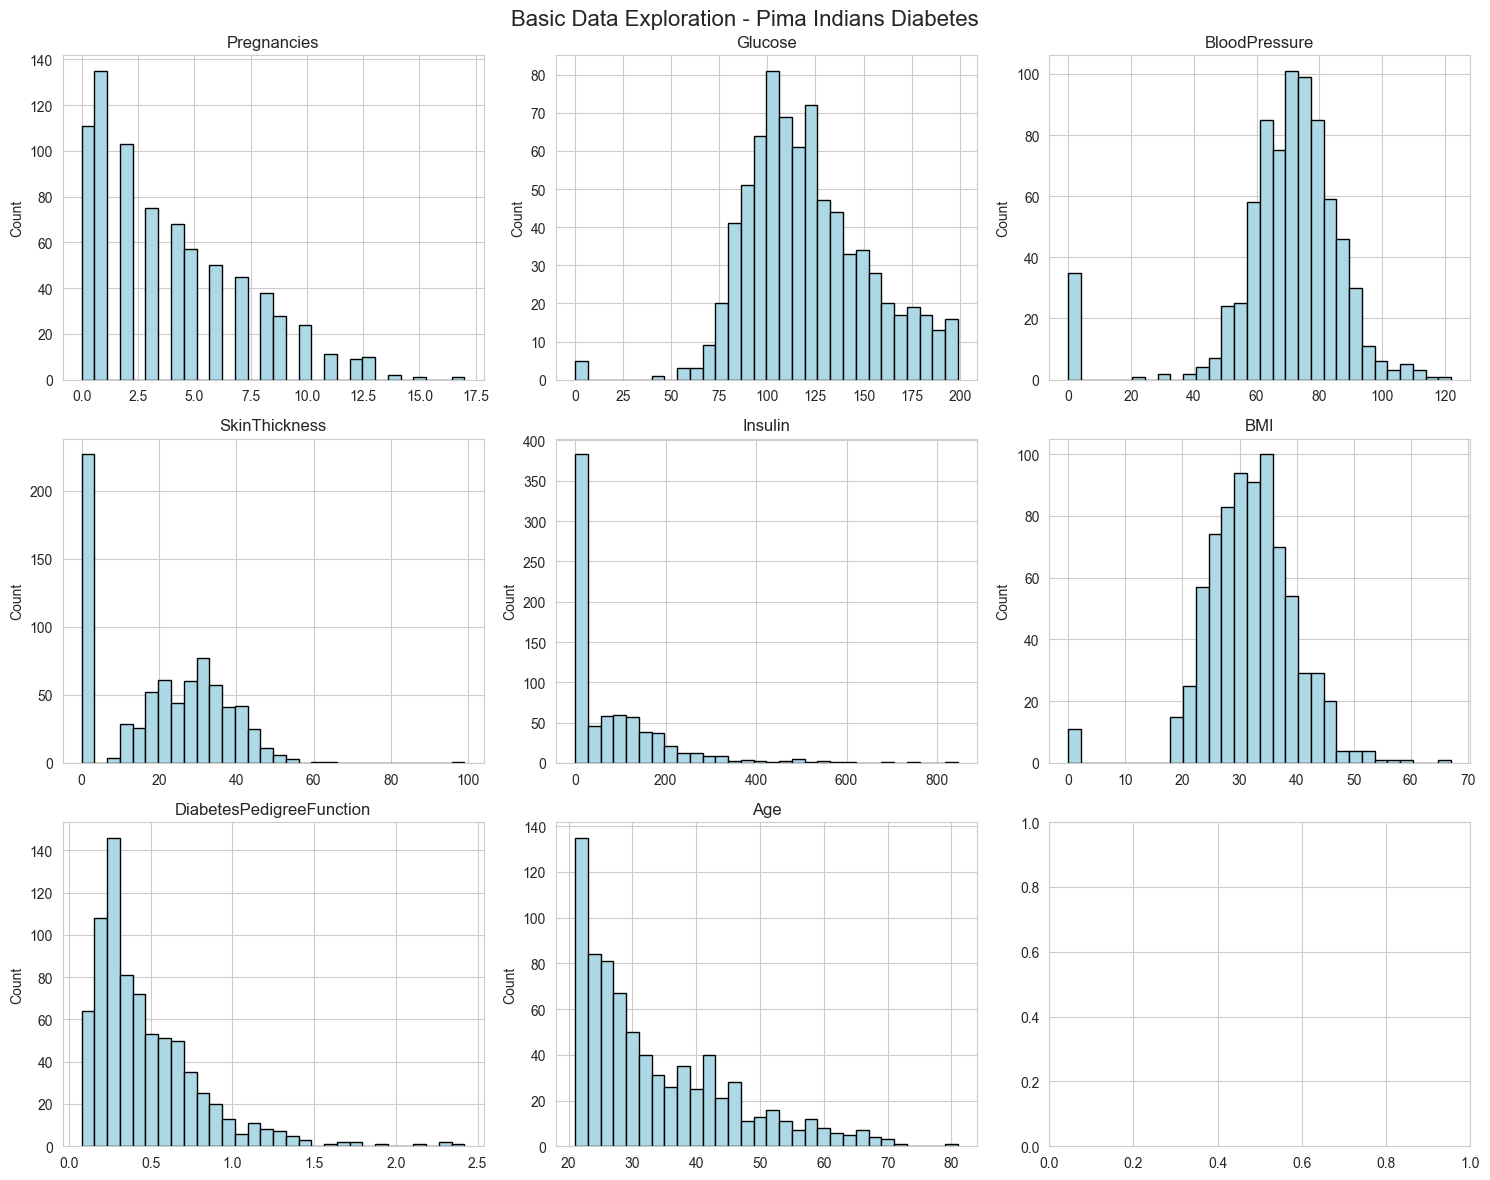

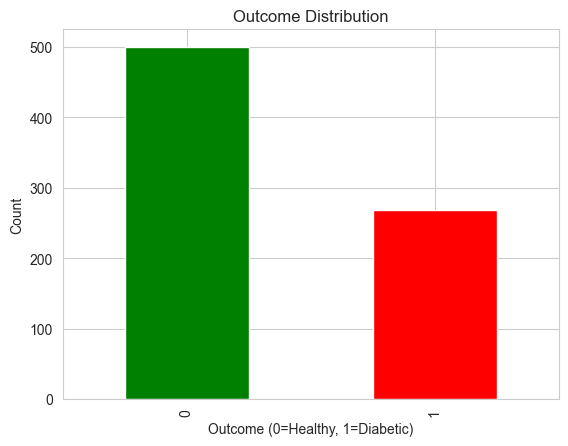

Basic EDA visualizations generated


In [9]:

sns.set_style('whitegrid')

# Lista kolumn numerycznych (bez Outcome)
numeric_cols = df.columns[:-1]

# Histogramy wszystkich cech w siatce 3x3
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Basic Data Exploration - Pima Indians Diabetes', fontsize=16)

for idx, col in enumerate(numeric_cols):
    row = idx // 3
    col_idx = idx % 3
    axes[row, col_idx].hist(df[col], bins=30, color='lightblue', edgecolor='black')
    axes[row, col_idx].set_title(col)
    axes[row, col_idx].set_xlabel('')
    axes[row, col_idx].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Rozkład zmiennej docelowej Outcome
df['Outcome'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Outcome Distribution')
plt.xlabel('Outcome (0=Healthy, 1=Diabetic)')
plt.ylabel('Count')
plt.show()

print("Basic EDA visualizations generated")


In [10]:
# =============================================================================
# HEALTHCARE-SPECIFIC ANALYSIS FOR MEDICAL DATA
# =============================================================================

print("\n" + "="*80)
print("HEALTHCARE ANALYSIS - Outliers/Impossible Values")
print("="*80)

# In medical data, a value of 0 often indicates missing measurement or error

problematic_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

print("\nNumber of values equal to 0 (suspicious/erroneous measurements)):\n")
for col in problematic_columns:
    zero_count = (df[col] == 0).sum()
    zero_percent = (zero_count / len(df)) * 100
    print(f"{col:25s}: {zero_count:3d} ({zero_percent:5.2f}%)")

print("\nZero values in these columns are medically impossible!")




HEALTHCARE ANALYSIS - Outliers/Impossible Values

Number of values equal to 0 (suspicious/erroneous measurements)):

Glucose                  :   5 ( 0.65%)
BloodPressure            :  35 ( 4.56%)
SkinThickness            : 227 (29.56%)
Insulin                  : 374 (48.70%)
BMI                      :  11 ( 1.43%)

Zero values in these columns are medically impossible!
